In [23]:
import pandas as pd
import numpy as np
import os
import dask.dataframe as dd
import matplotlib.pyplot as plt

In [3]:
def convert_to_float(value):
    return float(value.replace(',', '.'))

# Путь к папке с файлами
folder_path = r"F:\Inventory_2024-05\Электронные_билеты"

# Списки для хранения данных
data_2022 = []
data_2023 = []

# Чтение всех файлов и добавление данных в соответствующий список
for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        # Извлечение месяца и года из имени файла
        month_year = filename.split('.')[0]
        month = month_year[:2]
        year = month_year[2:]
        
        file_path = os.path.join(folder_path, filename)
        df = dd.read_csv(file_path, sep=';', encoding='latin1', converters={'TARIF_RUB': convert_to_float})
        
        # Добавление данных в соответствующий список
        if year == '2022':
            data_2022.append(df)
        elif year == '2023':
            data_2023.append(df)

# Объединение данных по каждому году
df_2022 = dd.concat(data_2022, ignore_index=True)
df_2023 = dd.concat(data_2023, ignore_index=True)

In [5]:
df_2022.compute()

,AIRL,CPTK,FLTDAT,DAIS,MCAR,FLTNUM,ORAP,DSAP,BCLS,FBTD,KOL_CPN,TARIF_RUB,SALE_CURR,TARIF_SALE,USE_STAT,USE_DAT
0,555,9410067382,11.01.2022,06.12.2021,SU,1833,MSQ,SVO,E,ECL,1,3265.67,SAR,"166,07",OK,NaN
1,555,9410067382,12.01.2022,06.12.2021,SU,522,SVO,DXB,E,ECL,1,11277.11,SAR,"573,47",OK,NaN
2,555,9410076207,20.01.2022,06.12.2021,SU,2139,IST,SVO,N,NNBA,1,3860.92,SAR,"196,34",OK,NaN
3,555,9410076207,21.01.2022,06.12.2021,SU,156,SVO,PUJ,N,NNBA,1,13864.77,SAR,"705,06",OK,NaN
4,555,9410095809,16.01.2022,06.12.2021,SU,1637,SIP,SVO,B,BPXRTRF,1,5063.65,SAR,"257,5",EXCH,16.12.2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590419,555,2408025542,28.12.2022,14.09.2022,SU,1701,VVO,SVO,P,PCDSOC,1,7400.00,RUB,7400,USED,28.12.2022
590420,555,2108030082,27.12.2022,14.09.2022,SU,6024,VKO,LED,V,VNBRISL,1,1749.72,RUB,"1749,72",OK,NaN
590421,555,2108030109,02.12.2022,14.09.2022,SU,1125,AER,SVO,G,GNBR,1,1000.00,RUB,1000,RFND,19.01.2023
590422,555,2108036702,03.12.2022,14.09.2022,SU,1511,SGC,SVO,G,GNBR,1,750.00,RUB,750,USED,03.12.2022


In [6]:
df_2022.head()

,AIRL,CPTK,FLTDAT,DAIS,MCAR,FLTNUM,ORAP,DSAP,BCLS,FBTD,KOL_CPN,TARIF_RUB,SALE_CURR,TARIF_SALE,USE_STAT,USE_DAT
0,555,9410067382,11.01.2022,06.12.2021,SU,1833,MSQ,SVO,E,ECL,1,3265.67,SAR,"166,07",OK,NaN
1,555,9410067382,12.01.2022,06.12.2021,SU,522,SVO,DXB,E,ECL,1,11277.11,SAR,"573,47",OK,NaN
2,555,9410076207,20.01.2022,06.12.2021,SU,2139,IST,SVO,N,NNBA,1,3860.92,SAR,"196,34",OK,NaN
3,555,9410076207,21.01.2022,06.12.2021,SU,156,SVO,PUJ,N,NNBA,1,13864.77,SAR,"705,06",OK,NaN
4,555,9410095809,16.01.2022,06.12.2021,SU,1637,SIP,SVO,B,BPXRTRF,1,5063.65,SAR,"257,5",EXCH,16.12.2021


# График цен по одному маркету

In [9]:
flight = df_2022[(df_2022['DSAP'] == 'SVX') & (df_2022['ORAP'] == 'SVO')]
flight.head()

,AIRL,CPTK,FLTDAT,DAIS,MCAR,FLTNUM,ORAP,DSAP,BCLS,FBTD,KOL_CPN,TARIF_RUB,SALE_CURR,TARIF_SALE,USE_STAT,USE_DAT
27,555,2144184761,01.01.2022,09.12.2021,SU,1406,SVO,SVX,I,NFM/SUUPG,1,6142.99,EUR,"73,69",EXCH,28.12.2021
280,555,9542689808,17.01.2022,04.01.2022,SU,1412,SVO,SVX,R,RCOSL,1,2935.40,TRY,"507,48",USED,17.01.2022
282,555,9542689809,17.01.2022,04.01.2022,SU,1412,SVO,SVX,R,RCOSL,1,2935.40,TRY,"507,48",USED,17.01.2022
2166,555,2141898563,27.01.2022,19.10.2021,SU,1414,SVO,SVX,R,RFMLA,1,3237.00,USD,"45,48",RFND,24.01.2022
2337,555,5843439362,19.01.2022,14.12.2021,SU,1038,SVO,SVX,N,NCL,1,6257.53,NOK,"764,24",USED,19.01.2022


In [16]:
sales = flight.groupby(by='FLTDAT')['TARIF_RUB'].sum().compute()
sales

FLTDAT
01.01.2022     3909051.51
02.01.2022     6146388.68
03.01.2022     6080666.61
04.01.2022     5373725.94
05.01.2022     6898811.44
                 ...     
27.12.2022    11486039.84
28.12.2022    12302423.34
29.12.2022    14479929.15
30.12.2022    11093747.54
31.12.2022     7497540.52
Name: TARIF_RUB, Length: 365, dtype: float64

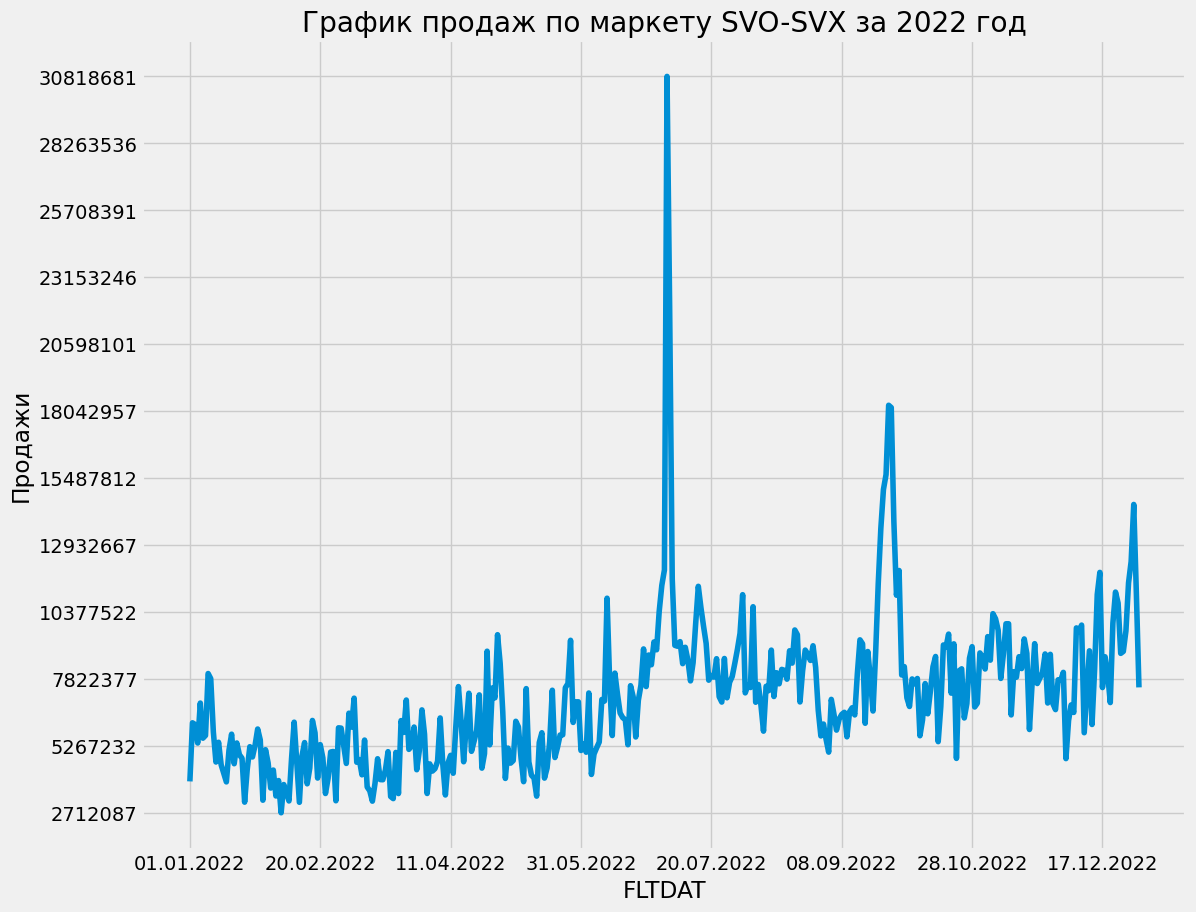

In [42]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(12, 10))
plt.xlabel("Дата")
plt.ylabel("Продажи")
plt.title("График продаж по маркету SVO-SVX за 2022 год")
sales.plot()
plt.yticks(np.linspace(sorted(sales.values)[0], sorted(sales.values)[-1], num=12),
           labels=map(lambda x: int(x), np.linspace(sorted(sales.values)[0], sorted(sales.values)[-1], num=12)
                     ))
plt.show()

# Расчет средней прибыли для 2022 года

In [50]:
mean_tarif_2022 = df_2022['TARIF_RUB'].mean().compute()

In [51]:
mean_tarif_2022

8800.688883295092

# Расчет средней прибыли для 2023 года

In [52]:
mean_tarif_2023 = df_2023['TARIF_RUB'].mean().compute()

In [53]:
mean_tarif_2023

12814.468560194691

# Условие для отбора рейсов с прибылью более 20% от среднего по году

In [54]:
condition_2022 = df_2022['TARIF_RUB'] > mean_tarif_2022 * 1.20
condition_2023 = df_2023['TARIF_RUB'] > mean_tarif_2023 * 1.20

# Отбор рейсов по условию

In [55]:
high_profit_2022 = df_2022[condition_2022]
high_profit_2023 = df_2023[condition_2023]

In [56]:
high_profit_2022_flight_numbers = high_profit_2022[['FLTDAT','FLTNUM', 'TARIF_RUB']].compute()
high_profit_2023_flight_numbers = high_profit_2023[['FLTDAT', 'FLTNUM', 'TARIF_RUB']].compute()

In [57]:
high_profit_2022_flight_numbers

,FLTDAT,FLTNUM,TARIF_RUB
1,12.01.2022,522,11277.11
3,21.01.2022,156,13864.77
6,12.01.2022,156,16206.01
8,12.01.2022,156,16206.01
10,28.01.2022,156,13529.63
...,...,...,...
590387,25.12.2022,1701,12877.51
590399,26.12.2022,524,20910.00
590400,26.12.2022,524,20910.00
590401,26.12.2022,524,20910.00


In [58]:
high_profit_2023_flight_numbers

,FLTDAT,FLTNUM,TARIF_RUB
4,17.01.2023,232,17139.03
5,28.01.2023,233,17139.04
11,05.01.2023,6532,23943.79
13,21.01.2023,6532,18257.65
15,07.01.2023,321,60907.97
...,...,...,...
585947,24.12.2023,209,30846.86
585948,31.12.2023,208,30846.86
585949,19.12.2023,1857,138299.84
585950,26.12.2023,1855,61371.31


In [59]:
unique_2022 = high_profit_2022_flight_numbers['FLTNUM'].unique()
unique_2023 = high_profit_2023_flight_numbers['FLTNUM'].unique()

In [60]:
len(unique_2022)

2357

In [61]:
len(unique_2023)

1791

# Сохранение уникальных рейсов в txt файл

In [42]:
unique_flight_numbers_2022_file = '2022.txt'
with open(unique_flight_numbers_2022_file, 'w') as file:
    for flight_number in unique_2022:
        file.write(f"{flight_number}\n")

In [43]:
unique_flight_numbers_2023_file = '2023.txt'
with open(unique_flight_numbers_2023_file, 'w') as file:
    for flight_number in unique_2023:
        file.write(f"{flight_number}\n")